In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/missingvalues_handeled.csv')

In [9]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


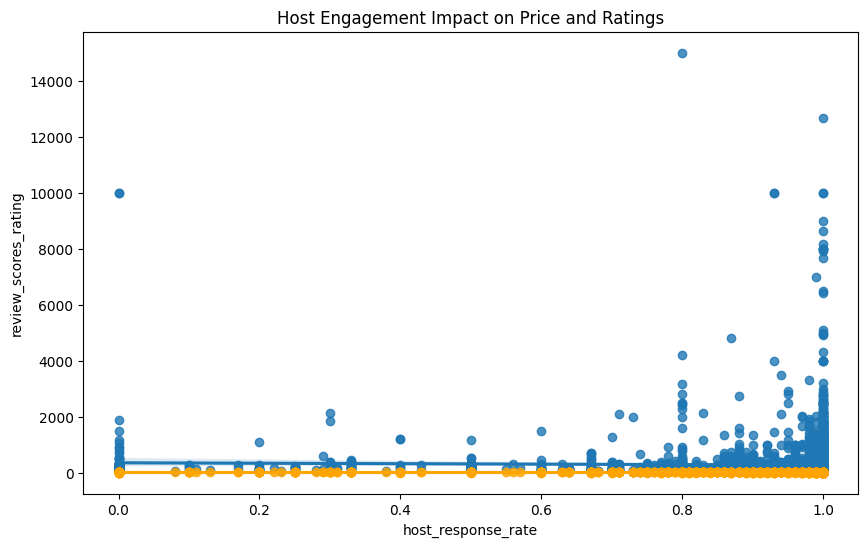

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(x='host_response_rate', y='price_in_dollar', data=df)
sns.regplot(x='host_response_rate', y='review_scores_rating', data=df, color="orange")
plt.title("Host Engagement Impact on Price and Ratings")
plt.show()


 this analysis indicates that higher host response rates are associated with better guest ratings, highlighting the importance of prompt host engagement in enhancing customer satisfaction.

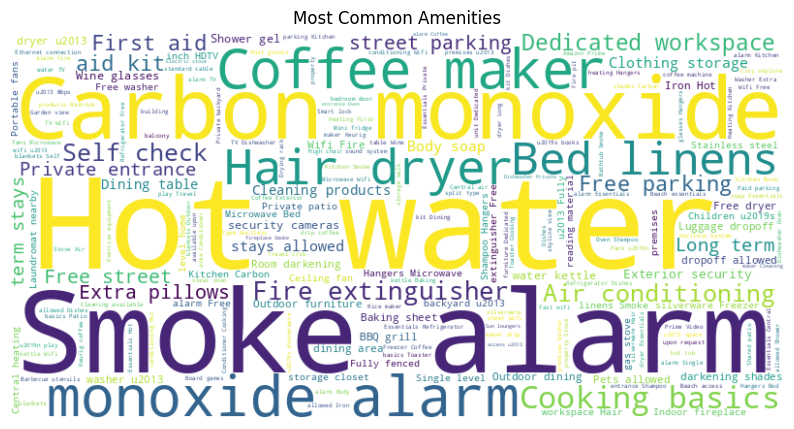

In [19]:
from wordcloud import WordCloud

# Concatenate all amenities into a single string for word cloud generation
amenities_text = " ".join(df['amenities'].dropna().str.replace('[{}"]', '').str.replace(',', ' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(amenities_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Amenities')
plt.show()

Guests prioritize safety and essential comforts in Airbnb listings, as evidenced by the prevalence of amenities like carbon monoxide alarms, reliable hot water, hair dryers, coffee makers, comfortable beds, and cooking basics. Hosts who cater to these fundamental needs enhance guest satisfaction, fostering positive reviews and increased bookings.

<ipython-input-25-5c9c247752c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type', y='accommodates', data=df, inner="quartile", palette="muted")


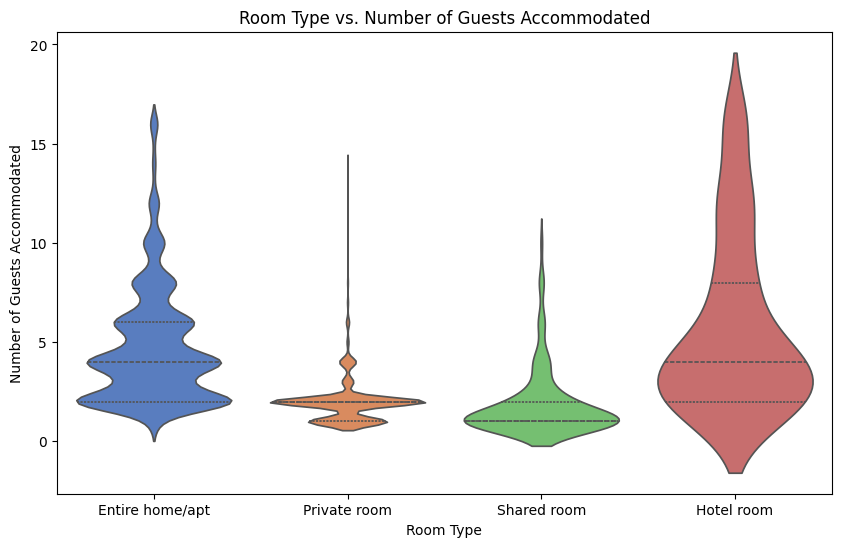

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='accommodates', data=df, inner="quartile", palette="muted")
plt.title('Room Type vs. Number of Guests Accommodated')
plt.xlabel('Room Type')
plt.ylabel('Number of Guests Accommodated')
plt.show()

Market Segmentation:

Entire Home/Apartment: Ideal for large groups or families, with a broad guest range. This segment can command premium prices.


Private and Shared Rooms: Cater to solo travelers or couples, often budget-conscious, requiring competitive pricing.


Hotel Rooms: Serve a range of guests, suitable for both solo travelers and small groups, allowing for dynamic pricing.

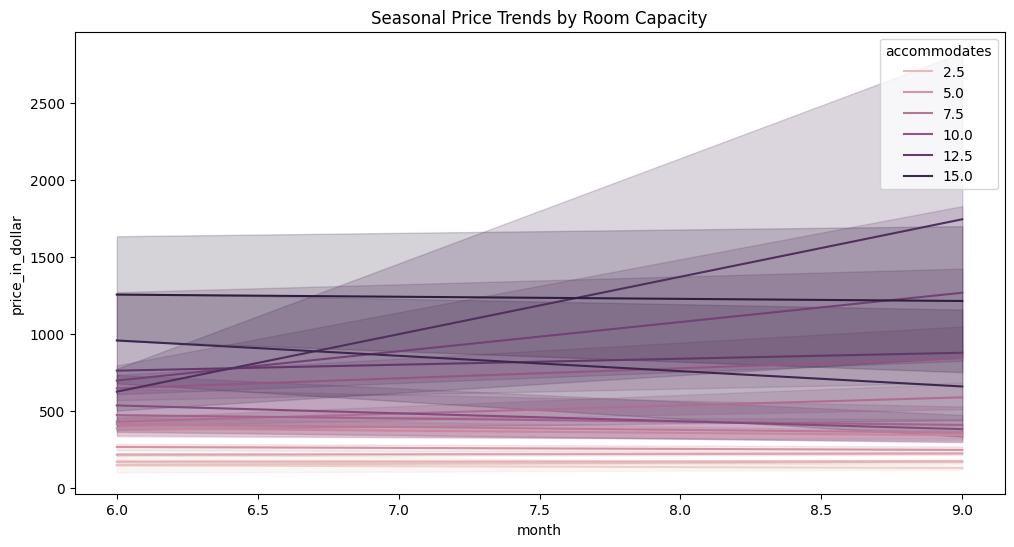

In [10]:
df['month'] = df['last_scraped'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='price_in_dollar', hue='accommodates', data=df)
plt.title("Seasonal Price Trends by Room Capacity")
plt.show()



The data reveals pricing opportunities by room capacity. High-capacity rooms see premium prices and volatility in peak months (6–9), suggesting potential for strategic price adjustments. Smaller rooms maintain steady, lower prices, catering to budget travelers, while mid-capacity rooms show stable demand, allowing for modest price increases in peak times. Late-season price declines in high-capacity rooms indicate an opportunity for last-minute discounts. Tailoring strategies for each segment—price adjustments for high-capacity, slight increases for mid-capacity, and off-peak promotions for smaller rooms—can optimize revenue across market segments.

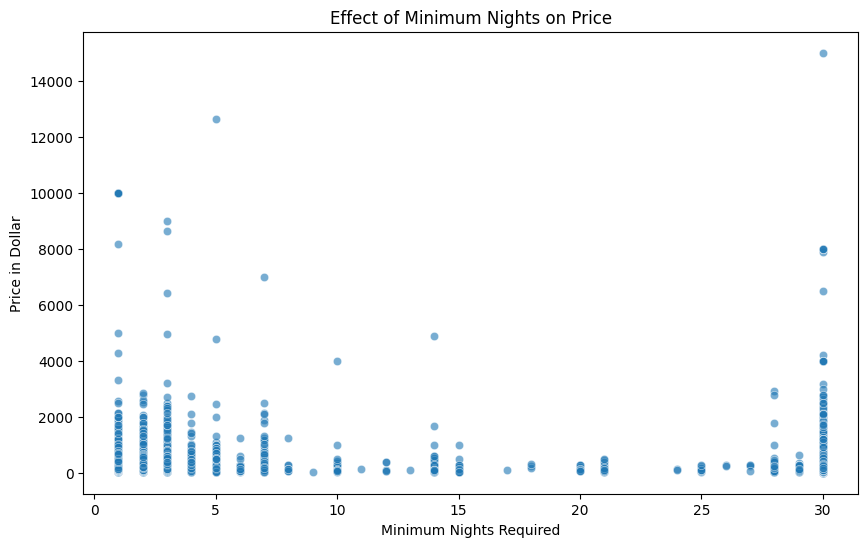

In [27]:
plt.figure(figsize=(10, 6))

# Filter out extreme minimum nights (e.g., over 30 days) to focus on more typical listings
df_filtered = df[df['minimum_nights'] <= 30]

# Plot Minimum Nights vs Price
sns.scatterplot(x='minimum_nights', y='price_in_dollar', data=df_filtered, alpha=0.6)
plt.title('Effect of Minimum Nights on Price')
plt.xlabel('Minimum Nights Required')
plt.ylabel('Price in Dollar')
plt.show()

0-5 Minimum Nights: These listings are more flexible, likely to attract short-term guests who need accommodation for a few days. They tend to have higher nightly rates, but lower revenue stability, as guests frequently check in and out. These listings are a good option for hosts who want to maximize occupancy.



30 Minimum Nights: These listings are designed for long-term guests, offering lower nightly prices but ensuring more predictable revenue. They are ideal for hosts who want long-term financial stability and are willing to accept a lower turnover rate. They are suitable for niche markets like business travelers or relocators.